In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

print(tf.__version__) 


In [2]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
BASE_DIR= '/mestrado/datasets'
IMG_ORG_DIR= path.join( BASE_DIR, 'carnaval_8lines_shuffle_orig', 'images')
LABELS_ORG_DIR= path.join( BASE_DIR, 'carnaval_8lines_shuffle_orig', 'labels')
IMG_TARGET_DIR= path.join( BASE_DIR, 'carnaval_8lines_shuffle', 'images')
LABELS_TARGET_DIR= path.join( BASE_DIR, 'carnaval_8lines_shuffle', 'labels')

In [4]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show_image( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [5]:
def _load_all():
    all_images= glob( os.path.join( IMG_ORG_DIR, "*.jpg"))
    # all_images= glob( '/content/carnaval_8lines/images/*.jpg')
    all_images.sort()
    all_images_content= [_load_image( f) for f in all_images]    
    all_images_content= np.asarray( all_images_content)

    all_labels=glob( os.path.join( LABELS_ORG_DIR, "*.pgn"))
    all_labels.sort()

    #ler todo o conteudo de labels e criar o vocabulario
    all_labels_content= [read_label( f) for f in all_labels]
    all_labels_content= [label.split() for label in all_labels_content]

    # pega somente os primeiros 4, equivalente a 1 poagina
    all_labels_content= [x[0:16] for x in all_labels_content]

    #complementa onde falta para completar 100
    all_labels_content= [
                np.pad( x, (0,16-len(x)), 'constant', constant_values= 'end') for x in all_labels_content]
    return all_images, all_images_content, all_labels, all_labels_content


def cut( img, lines, cols):
    cuts= []
    h= (int)(img.shape[ 0]/lines)
    w= (int)(img.shape[ 1]/cols)

    for i in range(0,lines):
      for j in range(0,cols):
        cuts.append( img[ (i*h):(i+1)*h, (j*w):(j+1)*w])
    return np.array( cuts)

def rebuild( cuts):
    return np.concatenate( 
        (np.concatenate( (cuts[0], cuts[2], cuts[4], cuts[6], cuts[8], cuts[10], cuts[12], cuts[14]), axis=0),
        np.concatenate( (cuts[1], cuts[3], cuts[5], cuts[7], cuts[9], cuts[11], cuts[13], cuts[15]), axis=0)),
        axis= 1
    )

def _shuffle( img, label, k):
    cuts= cut( img, 8, 2)

    # newcuts, newlabel= np.random.shuffle( cuts)
    newcuts, newlabel= shuffle( cuts, label, random_state= k)
    newimg= rebuild( newcuts)
    return newimg, newlabel


In [6]:
all_images, all_image_content, all_labels, label_content= _load_all()

In [7]:
for i in range( 0, 2):
    print( all_images[i])

/mestrado/datasets\carnaval_8lines_shuffle_orig\images\carnaval_0002_line_1_8.jpg
/mestrado/datasets\carnaval_8lines_shuffle_orig\images\carnaval_0004_line_1_8.jpg


['e4' 'c5' 'Nf3' 'e6' 'd4' 'cxd4' 'Nxd4' 'Nf6' 'Nc3' 'd6' 'Bb5+' 'Nbd7'
 'O-O' 'Be7' 'Be3' 'O-O']


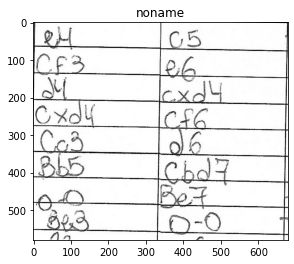

In [8]:
print( label_content[0])
show_image( all_image_content[0])

In [ ]:
print( resize( all_image_content[0], 50).shape)

In [9]:
def generate(N):
    count= 0;
    while True:
        for i in range( 0, len( all_image_content)):
            img, label= _shuffle(all_image_content[i], label_content[i], count)
            tag= "_"+ str(count).zfill(5)+"_MM" 
            write_image( 
                os.path.join( IMG_TARGET_DIR, 
                             os.path.basename( all_images[i]).replace( ".jpg", tag+".jpg")), resize( img, 50))
            write_label( 
                os.path.join( LABELS_TARGET_DIR, 
                             os.path.basename( all_labels[i]).replace( ".pgn", tag+".pgn")), " ".join( label))
            count+= 1
            if count%100== 0:
                print( count)
            if count>= N:
                return
            
generate(10000)
print( "DONE")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
DONE


In [ ]:
#le os arquivos de imagens

In [ ]:
def read_text_file( filename):
    f= open( filename, 'r')
    d= f.read()
    f.close()
    return d

In [ ]:
def show( img):
    plt.imshow( img)
    plt.title( 'picture')
    plt.show()

In [ ]:
#le imagem e label para 
def read_original( original_image_file):
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( original_image_file).name

    img= cv2.imread( original_image_file)
    label= read_text_file( 
        path.join( Path( original_image_file).parent, 
                  "..", 
                  "labels",
                  filename[0:-3]+"pgn"
                 )
    )
    return img, line_to_words( label)

img, label= read_original( filenames[0])

In [ ]:
show( img)

In [ ]:
label

In [ ]:
def filter_numeros( line):
    return re.sub( r"\d+\.", '', line)

In [ ]:
filter_numeros( label)

In [ ]:
def filter_chaves( s):
    _in= False
    r= []
    for x in s:
        if _in:
            if x== '}':
                _in= False
            continue

        #not in
        if x== '{':
            _in= True
            continue
            
        #not in & x!= '{'
        r.append( x)
    return ''.join(r)

filter_chaves( 'jdflkasjd{djklsafd} dfasdjf f{dkjfl}jk {}x)')



In [ ]:
def lines_to_words( all_lines):
    #filtered= [re.split( r'###', line)[1].lstrip().rstrip() for line in all_lines]
    filtered= [line.lstrip().rstrip() for line in all_lines]
    filtered= [filter_chaves( line) for line in filtered]
    filtered= [filter_numeros( line) for line in filtered]
    filtered= [line.split() for line in filtered]
    all_words= np.concatenate( filtered)   # matriz para vetor..
    return all_words
    
    #unique, counts= np.unique( all_words, return_counts= True)
    #words= np.asarray( (unique, counts)).T
    #return words

In [ ]:
def line_to_words( line):
    return lines_to_words([line])

In [ ]:
#words= line_to_words( label)

In [ ]:
len( words)

In [ ]:
def write_text_file( filename, data):
    f= open( filename, "w")
    f.write( data)
    f.close()
    #print( "Write text to "+ filename)

In [ ]:
def crop_only( img, y, h, x, w):
    crop_img= img[ y:y+h, x:x+w]
    return crop_img

In [ ]:
# 1. Gerar recorte de 8 linhas, tirando a coluna do meio e salvar 
# em 8lines. Nomear como "carnaval_0001_line1_8"
def do_crop_8lines( img):
    crop_img= crop_only( img, 599-pad, 560+2*pad, 467, 774)
    final_img= np.concatenate((
        crop_only( crop_img, 0, crop_img.shape[0], 0, 339), 
        crop_only( crop_img, 0, crop_img.shape[0], 339+96, 339)
    ), axis=1)
    return final_img

def extract_8lines_image( img):
    return do_crop_8lines( img)

def generate_8lines( img, words, image_fullpath):
    if len( words)< 16:
        print( "Menos de 16 movimentos. Skip..")
        return None
    
    folder= path.join( BASE_DIR, "carnaval_8lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_line_1_8"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= extract_8lines_image( img)  #TODO: extrair imagem
    new_pgn= " ".join( words[0:16])  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [ ]:
def crop_4lines( img_crop8):
    #primeiras 4 linhas
    return crop_only( img_crop8, 0, 70*4+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_4lines( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_4lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_line_1_4"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= crop_4lines( img_crop8)  #TODO: extrair imagem
    new_pgn= " ".join( words[0:8])  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [ ]:
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_2lines( img_crop8, linha=0):
    #linha: 0, 1, 2... 6   
    y= linha*70
    return crop_only( img_crop8, y, 70*2+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_2lines( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_2lines")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..6
    for linha in range(0,7):
    
        # define nome
        new_name= "carnaval_"+filename[18:22]+ "_line_"+str(linha+1)+"_"+ str(linha+3)
        new_image_file= path.join( folder, "images", new_name+ '.jpg')
        new_label_file= path.join( folder, "labels", new_name+ '.pgn')

        new_img= crop_2lines( img_crop8, linha)  #TODO: extrair imagem
        new_pgn= " ".join( words[linha*2:linha*2+4])  #TODO: extrair texto

        # escreve arquivo
        cv2.imwrite( new_image_file, new_img)
        #print( "Write image to  "+ new_image_file)
        write_text_file( new_label_file, new_pgn)

In [ ]:
# 4. Gerar recorte de 1 linhas, para cada linhas nomeando como 
# line_1, line_2. "carnaval_0001_line1"
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_1_line( img_crop8, linha=0):
    #linha: 0, 1, 2... 7   
    y= linha*70
    return crop_only( img_crop8, y, 70+2*pad, 0, img_crop8.shape[1])

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_1line( img_crop8, words, image_fullpath):
    if len( words)< 8:
        return
    
    folder= path.join( BASE_DIR, "carnaval_1line")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..7
    for linha in range(0,8):
    
        # define nome
        new_name= "carnaval_"+filename[18:22]+ "_line_"+str(linha+1)
        new_image_file= path.join( folder, "images", new_name+ '.jpg')
        new_label_file= path.join( folder, "labels", new_name+ '.pgn')

        new_img= crop_1_line( img_crop8, linha)  #TODO: extrair imagem
        new_pgn= " ".join( words[linha*2:linha*2+2])  #TODO: extrair texto

        # escreve arquivo
        cv2.imwrite( new_image_file, new_img)
        #print( "Write image to  "+ new_image_file)
        write_text_file( new_label_file, new_pgn)


In [ ]:
# 5. Gerar recorte de 1 word, para todas as linhas, nomeando como 
# word_1, word_2, word_.... "carnaval_0001_word1"

# 4. Gerar recorte de 1 linhas, para cada linhas nomeando como 
# line_1, line_2. "carnaval_0001_line1"
# 3. Gerar rocorte de 2 linhas, para cada sequencia de 2 linhas, nomeando
# como line1_2, line2_3, line3_4, line4_5, .. "carnaval_0001_line1_2"
def crop_1word( img_crop8, linha, coluna):
    #linha: 0, 1, ...7
    #coluna: 0, 1
    y= linha*70
    x= coluna*339
    return crop_only( img_crop8, y, 70+2*pad, x, 339)

# 2. Gerar recorte de 4 linhas (1_4), a partir do recorte de 
# 8 e gerar os arquivos. Nomear como "carnaval_0001_line1_4"
def generate_1word( img_crop8, words, image_fullpath):
    if len( words)< 16:
        return
    
    folder= path.join( BASE_DIR, "carnaval_1word")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    #0,1,..7
    word= 0
    for linha in range(0,8):
        #0,1,..7
        for coluna in [0,1]:
    
            # define nome
            new_name= "carnaval_"+filename[18:22]+ "_word_"+str(word+1)
            new_image_file= path.join( folder, "images", new_name+ '.jpg')
            new_label_file= path.join( folder, "labels", new_name+ '.pgn')

            new_img= crop_1word( img_crop8, linha, coluna)  #TODO: extrair imagem
            new_pgn= words[word]  #TODO: extrair texto

            # escreve arquivo
            cv2.imwrite( new_image_file, new_img)
            #print( "Write image to  "+ new_image_file)
            write_text_file( new_label_file, new_pgn)
            word= word+1


In [ ]:
len( filenames)

In [ ]:
#TODO: adicionar padding vertical nas imagens

def generate_all( filenames):
    total= len( filenames)
    count= 1
    for f in filenames:
        print( "Processando "+ f+"..."+ str(count)+"/"+str(total))
        img, words= read_original( f)
        #print( words[0:10])
        #print( img.shape)
        #show( img)

        if len( words)< 16:
            print( "NAO TEM 16 MOVIMENTOS. SKIP..")
            continue
        
        img_8crop= generate_8lines( img, words, f)
        #show( img_8crop)
        
        #generate 4 lines
        generate_4lines( img_8crop, words, f)
        #generate 2 lines
        generate_2lines( img_8crop, words, f)
        #generate 1 line
        generate_1line( img_8crop, words, f)
        #generate 1 word
        generate_1word( img_8crop, words, f)
        count= count+1


generate_all( filenames)

In [ ]:
# 1. Gerar recorte de 8 linhas, tirando a coluna do meio e salvar 
# em 8lines. Nomear como "carnaval_0001_line1_8"
def do_crop_full( img):
    return crop_only( img, 570, 1800, 440, 1585)
    
def generate_fullpage( img, words, image_fullpath):
    
    folder= path.join( BASE_DIR, "carnaval_fullpage")
    
    #original_file= "carnaval_original_0001.jpg"    
    filename= Path( image_fullpath).name
    
    # define nome
    new_name= "carnaval_"+filename[18:22]+ "_fullpage"
    new_image_file= path.join( folder, "images", new_name+ '.jpg')
    new_label_file= path.join( folder, "labels", new_name+ '.pgn')
    
    new_img= do_crop_full( img)  #TODO: extrair imagem
    new_pgn= " ".join( words)  #TODO: extrair texto
    
    # escreve arquivo
    cv2.imwrite( new_image_file, new_img)
    #print( "Write image to  "+ new_image_file)
    write_text_file( new_label_file, new_pgn)
    
    return new_img

In [ ]:
def generate_all_full( filenames):
    total= len( filenames)
    count= 1
    for f in filenames:
        print( "Processando "+ f+"..."+ str(count)+"/"+str(total))
        img, words= read_original( f)

        if len( words)< 16:
            print( "NAO TEM 16 MOVIMENTOS. SKIP..")
            continue
        
        img_8crop= generate_fullpage( img, words, f)
        count= count+1


generate_all_full( filenames)